# Read, process and save IDAWEB precipitation data
First "contact" with the IDAWEB data... So it's a lot of trial and error. The endproduct is a preprocessed monthly precipitation data set!

In [1]:
# import section
import numpy as np
import pandas as pd

from gmplot import gmplot

%matplotlib inline

import os
import sys

# include my idaweb module
sys.path.append('../code/')
import idaweb

### List files, do some housekeeping
In the following I'll use data from the *order 61302*. This order contains all stations in the canton Bern above 2000 m altitude which record precipitation. Some stations log precipitation sums per days, some between 6UTC and 6UTC of the following day, and some per month... This was my second order from IDAWEB and is therefore a bit chaotic. However, for the moment we are only interested in the monthly precipitation sums of the station *Eigergletscher* and *Kleine Scheidegg*. These provide precipitation records for almost the entire 20th century.

In [2]:
# specfify path to order directory
order_path = '../raw_data/idaweb_data/order61302'
index_file, legend_files, data_files = idaweb.list_files(order_path)

In [3]:
# read index file
index = idaweb.read_index_file(os.path.join(order_path, index_file), file_type='all')
# get files with montly prcipitation sum
montly_datafiles = index.loc[index.Parameter.str.contains('Monat') & index.Dateityp.str.contains('Daten'), 'Dateiname']
montly_metafiles = index.loc[index.Parameter.str.contains('Monat') & index.Dateityp.str.contains('Legend'), 'Dateiname']

In [4]:
index

,Dateiname,Dateityp,Station,Parameter,Zeitinterval
0,order_61302_EIG_rre150m0_1_data.txt,Daten,Eigergletscher,Niederschlag; Monatssumme,190810-195204
1,order_61302_EIG_rre150m0_1_legend.txt,Legende,Eigergletscher,Niederschlag; Monatssumme,190810-195204
2,order_61302_SLFES2_rre150d0_1_data.txt,Daten,Frutigen / Elsige,Niederschlag; Tagessumme 6 UTC - 6 UTC Folgetag,20001109-20161106
3,order_61302_SLFES2_rre150d0_1_legend.txt,Legende,Frutigen / Elsige,Niederschlag; Tagessumme 6 UTC - 6 UTC Folgetag,20001109-20161106
4,order_61302_SLFES2_rre150d0_2_data.txt,Daten,Frutigen / Elsige,Niederschlag; Tagessumme 6 UTC - 6 UTC Folgetag,20170208-20180810
5,order_61302_SLFES2_rre150d0_2_legend.txt,Legende,Frutigen / Elsige,Niederschlag; Tagessumme 6 UTC - 6 UTC Folgetag,20170208-20180810
6,order_61302_SLFOTT_rre150d0_1_data.txt,Daten,Frutigen / Ottere,Niederschlag; Tagessumme 6 UTC - 6 UTC Folgetag,20000609-20161106
7,order_61302_SLFOTT_rre150d0_1_legend.txt,Legende,Frutigen / Ottere,Niederschlag; Tagessumme 6 UTC - 6 UTC Folgetag,20000609-20161106
8,order_61302_SLFOTT_rre150d0_2_data.txt,Daten,Frutigen / Ottere,Niederschlag; Tagessumme 6 UTC - 6 UTC Folgetag,20170130-20180814
9,order_61302_SLFOTT_rre150d0_2_legend.txt,Legende,Frutigen / Ottere,Niederschlag; Tagessumme 6 UTC - 6 UTC Folgetag,20170130-20180814


In [5]:
montly_datafiles

0       order_61302_EIG_rre150m0_1_data.txt
34    order_61302_BEKSE_rre150m0_1_data.txt
36      order_61302_KSE_rre150m0_1_data.txt
Name: Dateiname, dtype: object

In [6]:
montly_metafiles

1       order_61302_EIG_rre150m0_1_legend.txt
35    order_61302_BEKSE_rre150m0_1_legend.txt
37      order_61302_KSE_rre150m0_1_legend.txt
Name: Dateiname, dtype: object

In [7]:
# drop the BEKSE data since it overlaps with the KSE data anyway
montly_datafiles = montly_datafiles.drop(34).values
montly_metafiles = montly_metafiles.drop(35).values

### View meta files
The *Legende* file list meta data for the corresponding data file. This includes the used stations, there properties (coordinates, altitude, ...) and parameters.

In [8]:
# create empty containers for stations and parameters
stations = list()
parameters = list()

# read and show legend files
for montly_metafile in montly_metafiles:
    montly_metafile = os.path.join(order_path, montly_metafile)
    # legend file contains station and parameter list
    stn, param = idaweb.read_legend_file(montly_metafile, lang='de')
    
    # add to corresponding container
    stations.append(stn)
    parameters.append(param)
    
# convert into DataFrames
stations = pd.concat(stations, axis=0).drop_duplicates()
parameters = pd.concat(parameters, axis=0).drop_duplicates()

In [9]:
stations

,Name,Parameter,Datenquelle,Länge/Breite,Koordinaten [km],Höhe ü. M. [m]
stn,,,,,,
EIG,Eigergletscher,rre150m0,MeteoSchweiz,7°58'/46°35',640950/158350,2320
KSE,Kleine Scheidegg,rre150m0,MeteoSchweiz,7°58'/46°35',639896/159346,2060


In [10]:
# save to file
stations.to_csv('../raw_data/station_data/monthly_precip_stations.csv')

In [11]:
parameters

,Einheit,Beschreibung
rre150m0,mm,Niederschlag; Monatssumme


### Read precipitation data
In the following I read the precipitation data from files, using the reading function of my IDAWEB module. Some manipulations (like date parsing) are performed on the DataFrame, before the data is stored to file in order to allow further usage... 

In [12]:
# define data parser for year month date format
montly_parser = lambda x: pd.datetime.strptime(x, '%Y%m')

In [13]:
# create empty list as container
data_df = list()

# read all data files
for data_file in montly_datafiles:
    data_file = os.path.join(order_path, data_file)
    data = idaweb.read_data_file(data_file, date_parser=montly_parser)
    data_df.append(data)
    
# convert into DataFrame
data_df = pd.concat(data_df, axis=1)

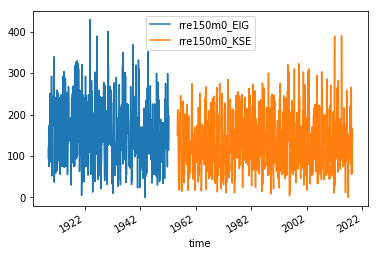

In [14]:
# view data
data_df.plot()

In [15]:
# drop parameter in column names
data_df.columns = data_df.columns.str.replace('rre150m0_', '')

In [16]:
data_df.head()

,EIG,KSE
time,,
1908-11-01,120.0,NaN
1908-12-01,94.0,NaN
1909-01-01,117.0,NaN
1909-02-01,75.0,NaN
1909-03-01,174.0,NaN


In [17]:
# save this data to file
path = '../raw_data/station_data/monthly_precip_eiger_scheidegg.csv'
data_df.to_csv(path)